# 基于决策树算法实现员工离职率预测

## 一、引入工具包

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV 

## 二、数据加载

In [2]:
data = pd.read_csv('../data/train.csv')
pd.set_option('display.max_columns', None)
data.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [3]:
data.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,2.055272,2.732993,6458.690476,14247.159864,2.703231,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,1.106040,1.102477,4724.845883,7133.767499,2.521301,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2858.750000,7912.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4850.500000,14225.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,3.000000,4.000000,8380.250000,20372.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [4]:
data.columns

Index(['user_id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.shape

(1176, 36)

## 三、数据预处理

### 3.1 重复值处理

In [6]:
print("样本去重前样本数量：{}".format(data.shape[0]))
print("样本去重后样本数量：{}".format(data.drop_duplicates().shape[0]))

样本去重前样本数量：1176
样本去重后样本数量：1176


### 3.2 缺失值处理 

In [7]:
missingDf = data.isnull().sum().sort_values(ascending = False).reset_index()
missingDf.columns = ['feature','missing_num']
missingDf['missing_percentage'] = missingDf['missing_num'] / data.shape[0]
missingDf.head()

,feature,missing_num,missing_percentage
0,YearsWithCurrManager,0,0.0
1,YearsSinceLastPromotion,0,0.0
2,JobLevel,0,0.0
3,JobInvolvement,0,0.0
4,HourlyRate,0,0.0


### 3.3 异常值处理

#### 3.31 数值型特征

In [8]:
numeric_columns = []
object_columns = []
for c in data.columns:
    if data[c].dtype == 'object':
        object_columns.append(c)
    else:
        numeric_columns.append(c)

In [9]:
len(numeric_columns)

27

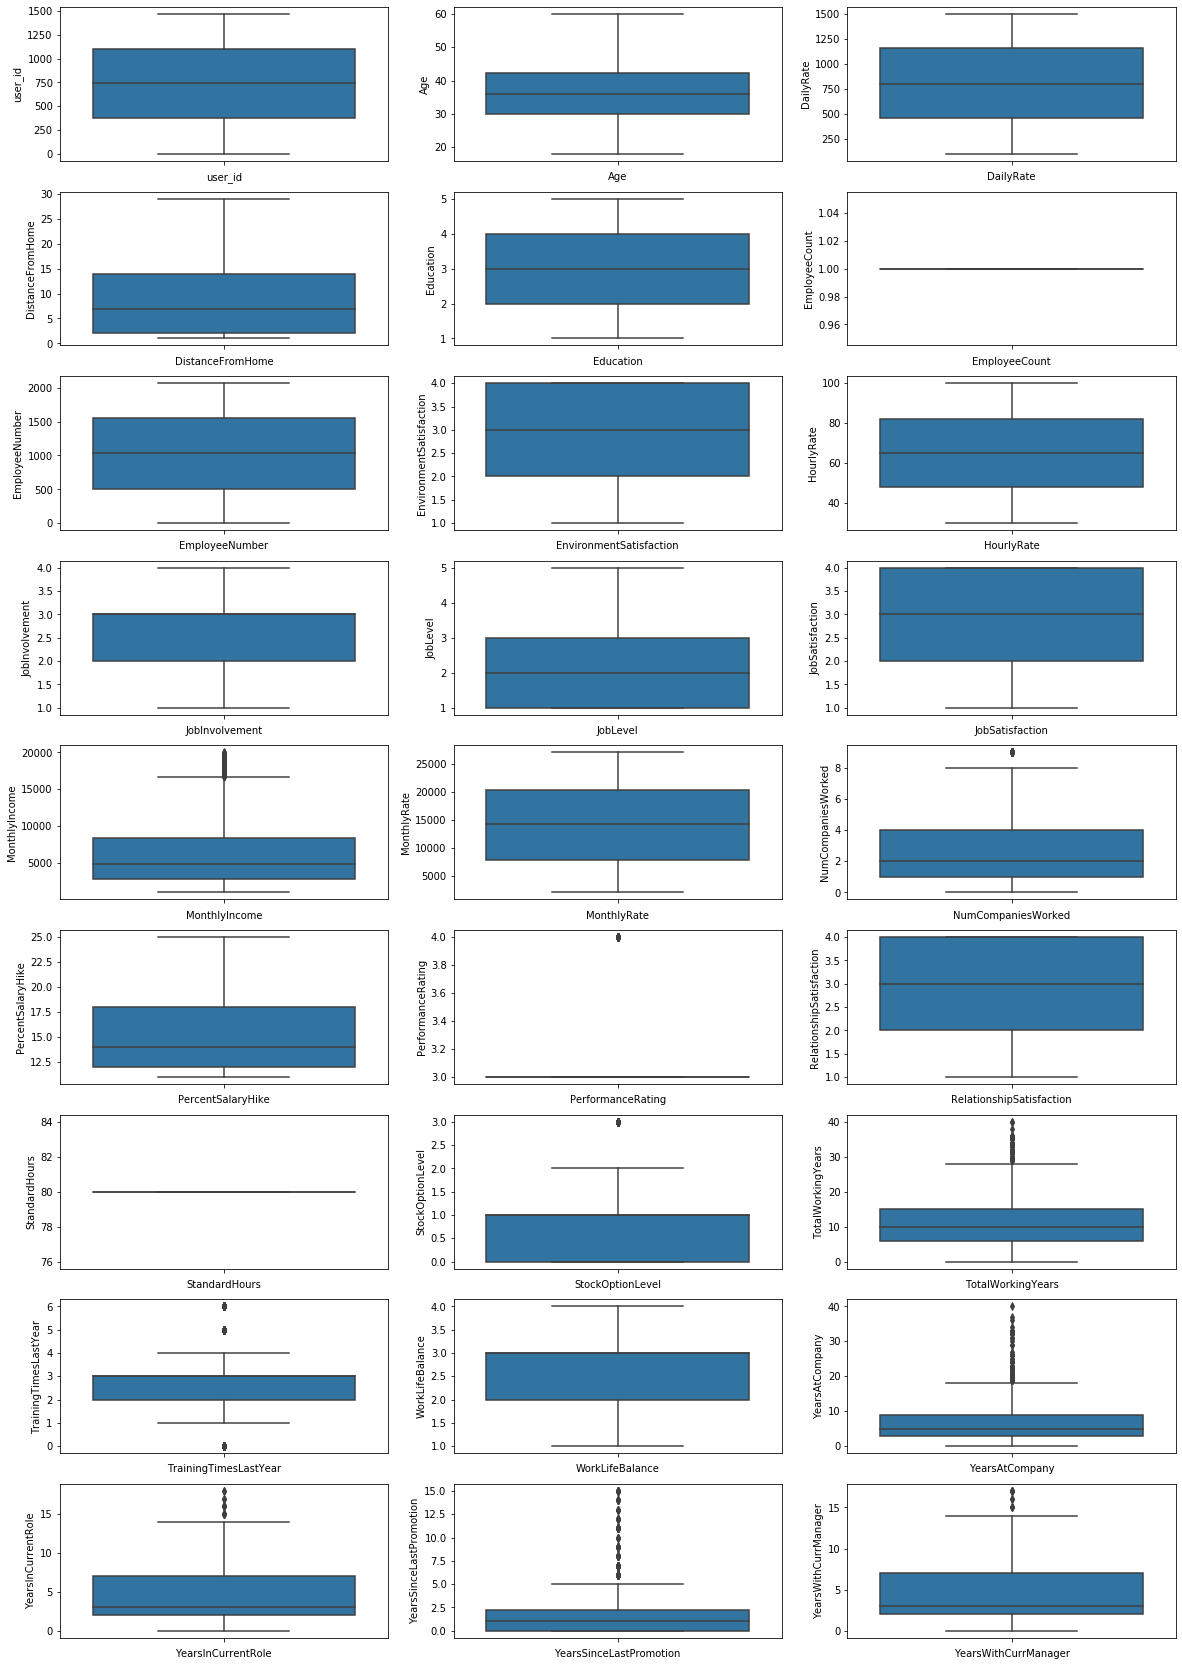

In [10]:
fig = plt.figure(figsize=(20,30))
for i,col in enumerate(numeric_columns):
    ax = fig.add_subplot(9,3,i+1)
    sns.boxplot(data[col],orient='v',ax=ax)
    plt.xlabel(col)
plt.show()

In [11]:
data[data['TotalWorkingYears'] > 30][['Age','TotalWorkingYears']]

,Age,TotalWorkingYears
5,52,31
27,55,34
53,60,33
81,56,36
182,50,32
193,51,31
355,51,33
375,52,34
386,55,31
442,54,36


## 四、特征选择

### 4.1 删除明显无关特征

In [12]:
data.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,2.055272,2.732993,6458.690476,14247.159864,2.703231,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,1.106040,1.102477,4724.845883,7133.767499,2.521301,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2858.750000,7912.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4850.500000,14225.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,3.000000,4.000000,8380.250000,20372.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [13]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [14]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [15]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [16]:
data.drop(['user_id','EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

### 4.1 数值型特征相关性

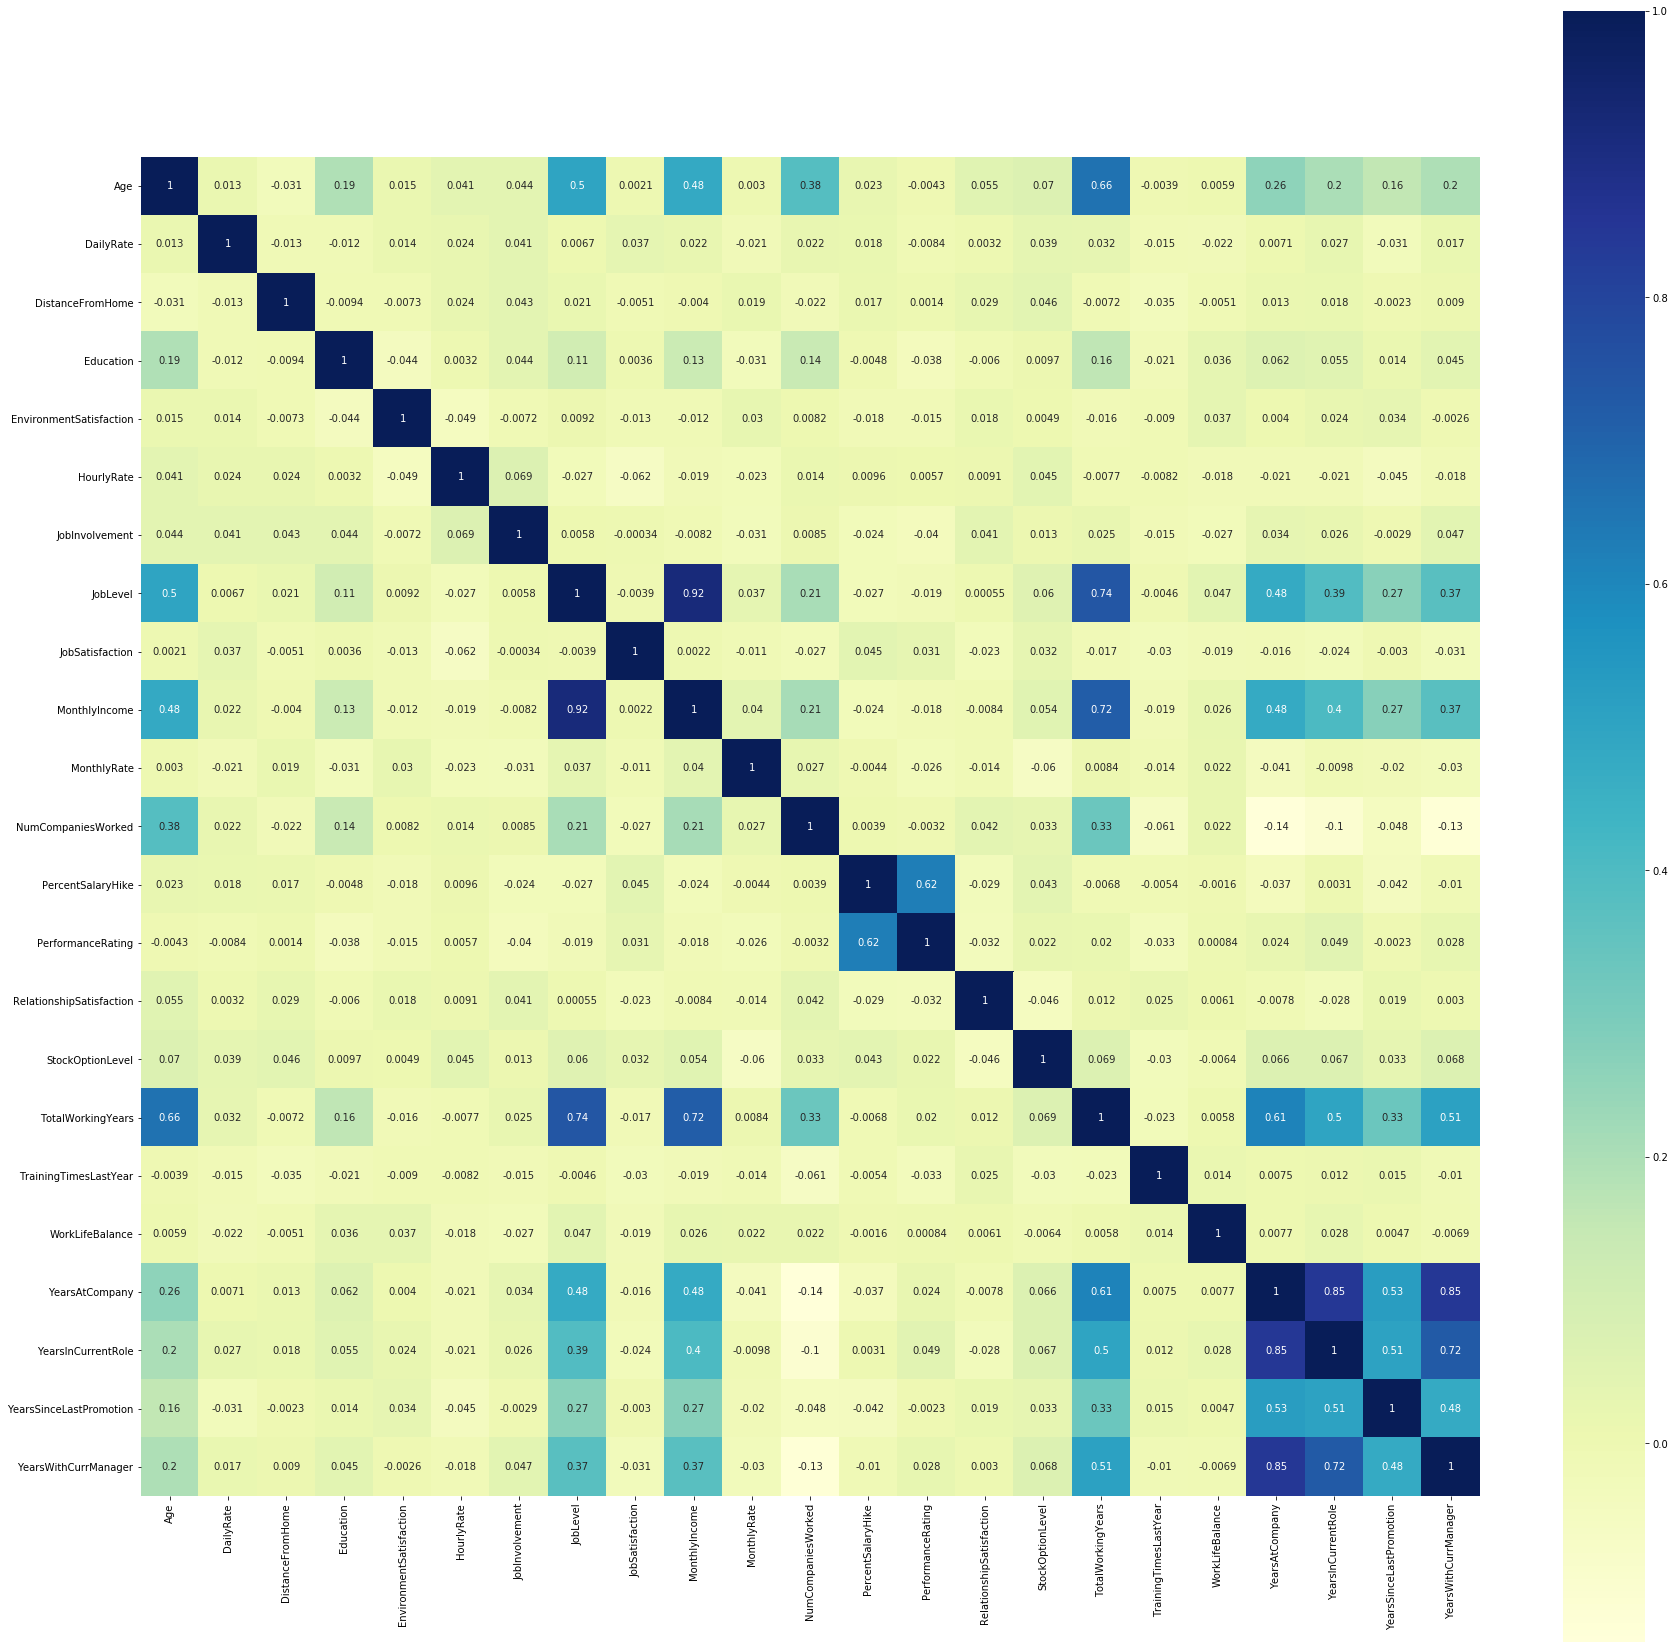

In [17]:
pearson_mat = data.corr(method='spearman')

fig= plt.figure(figsize=(30,30))
ax = sns.heatmap(pearson_mat,square=True,annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
fig.savefig("D:/temp.png")

##### 处理收入类特征

In [18]:
# data.drop(['HourlyRate','DailyRate'],axis=1,inplace=True)

##### JOblevel和MonthlyRate相关性过高，删除

In [19]:
data.drop(['JobLevel'],axis=1,inplace=True)

#####  YearsAtCompany 和YearsInCurrentRole 、YearsWithCurrManager相关性过高，删除

In [20]:
data.drop(['YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

##### PerformanceRating 和PercentSalaryHike相关性过高，且PerformanceRating不明显影响员工离职率

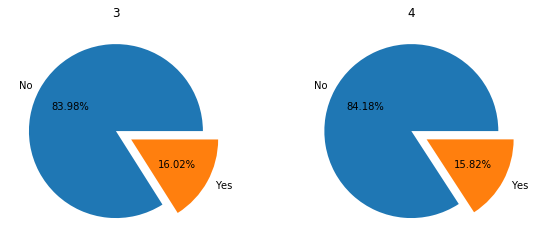

In [21]:
# PerformanceRating:绩效评估
fig = plt.figure(figsize=(15,4)) # 建立图像
L1 = list(data['PerformanceRating'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(1,3,i+1)
    p = data[data['PerformanceRating'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

In [22]:
data.drop(['PerformanceRating'],axis=1,inplace=True)

##### 总工作时长与年龄，月收入，在公司工作时长相关性过高，删除

In [23]:
data.drop(['TotalWorkingYears'],axis=1,inplace=True)

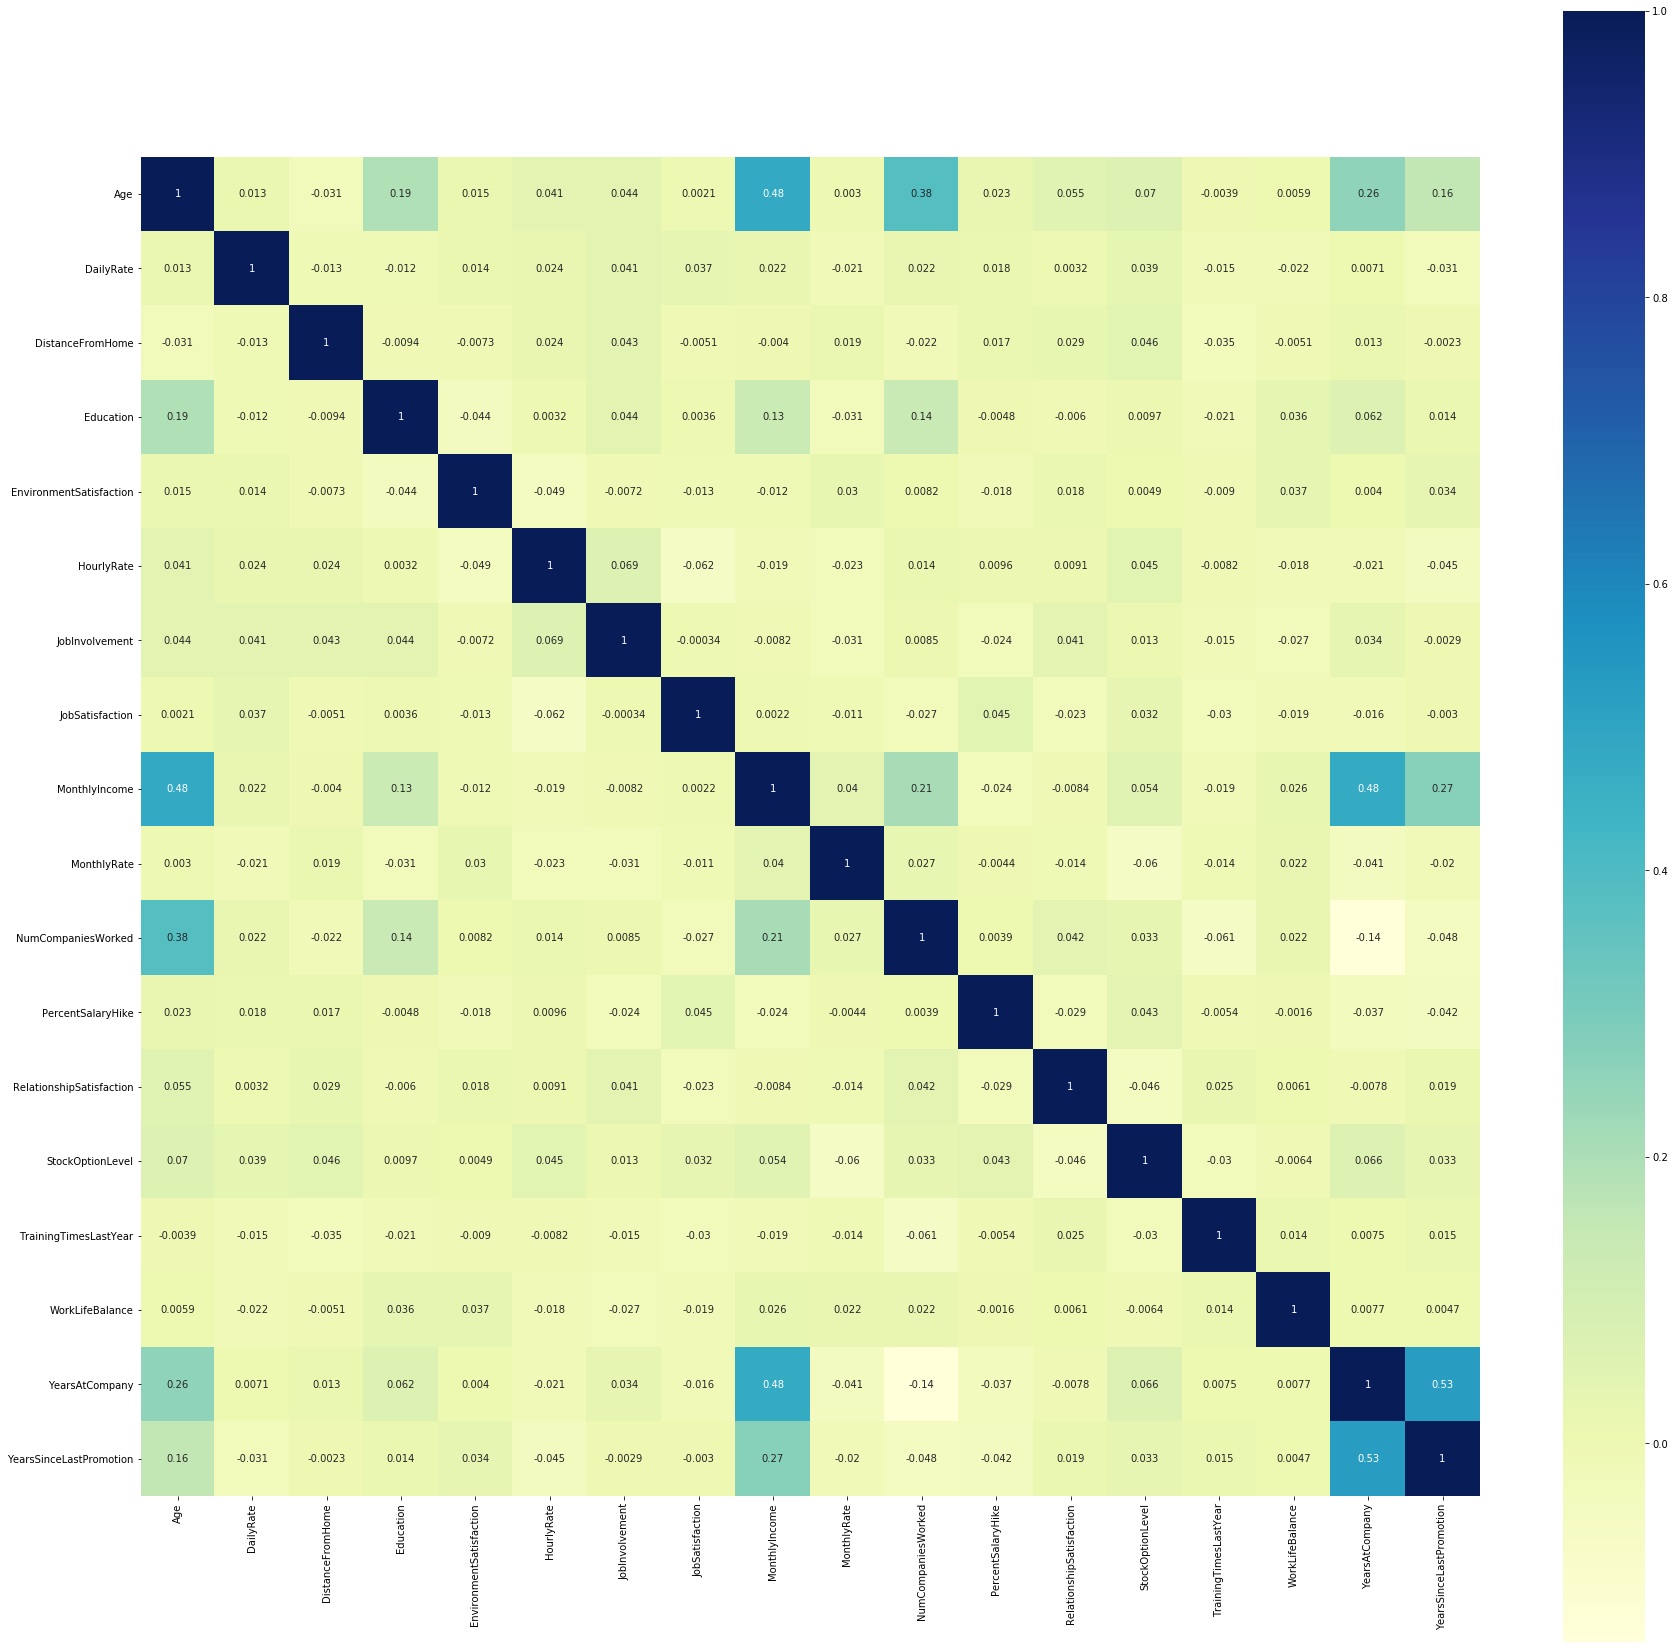

In [24]:
pearson_mat = data.corr(method='spearman')

fig= plt.figure(figsize=(30,30))
ax = sns.heatmap(pearson_mat,square=True,annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 4.2 离散型类别特征

In [25]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object)

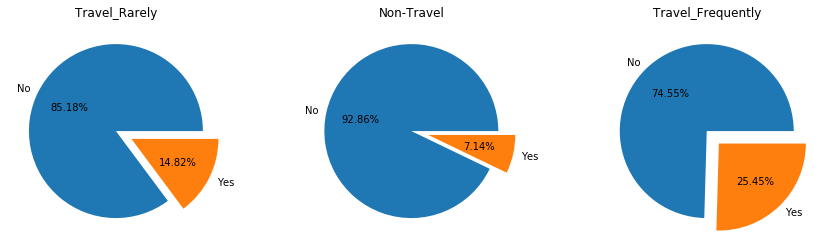

In [26]:
# BusinessTravel:商务差旅频率
fig = plt.figure(figsize=(15,4)) # 建立图像
L1 = list(data['BusinessTravel'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(1,3,i+1)
    p = data[data['BusinessTravel'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

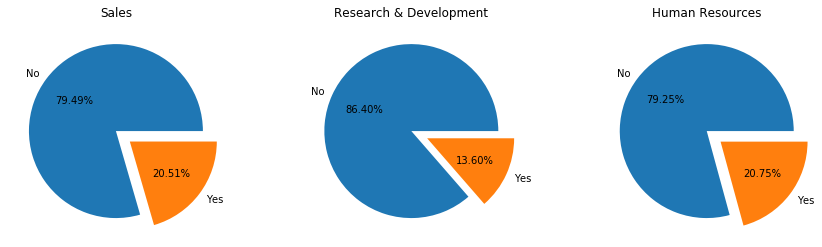

In [27]:
# Department 员工所在部门
fig = plt.figure(figsize=(15,4)) # 建立图像
L1 = list(data['Department'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(1,3,i+1)
    p = data[data['Department'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

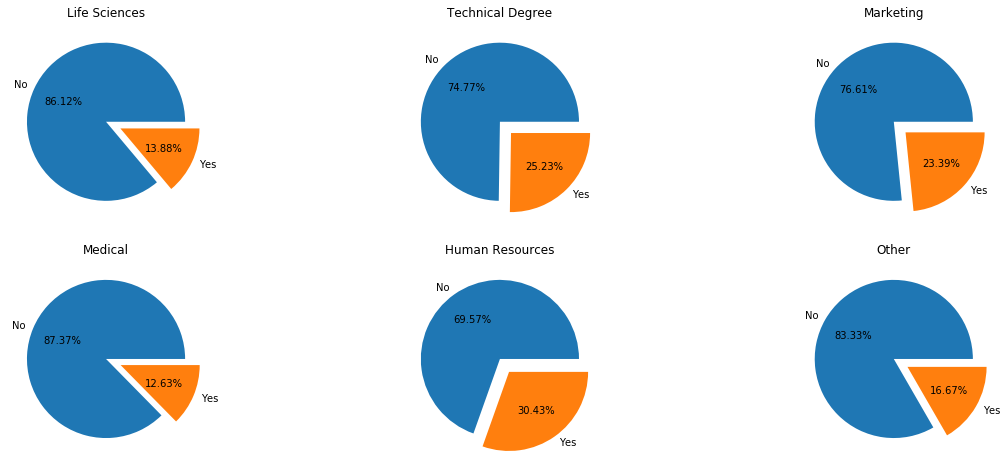

In [28]:
# EducationField 员工所学习的专业领域

fig = plt.figure(figsize=(20,8)) # 建立图像
L1 = list(data['EducationField'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(2,3,i+1)
    p = data[data['EducationField'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

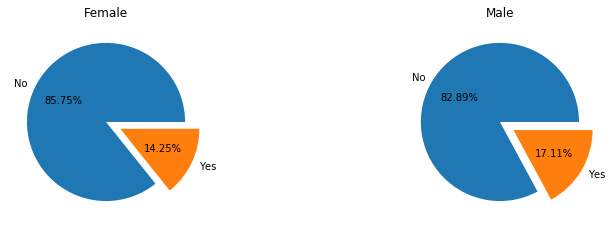

In [29]:
# Gender
fig = plt.figure(figsize=(20,8)) # 建立图像
L1 = list(data['Gender'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(2,3,i+1)
    p = data[data['Gender'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

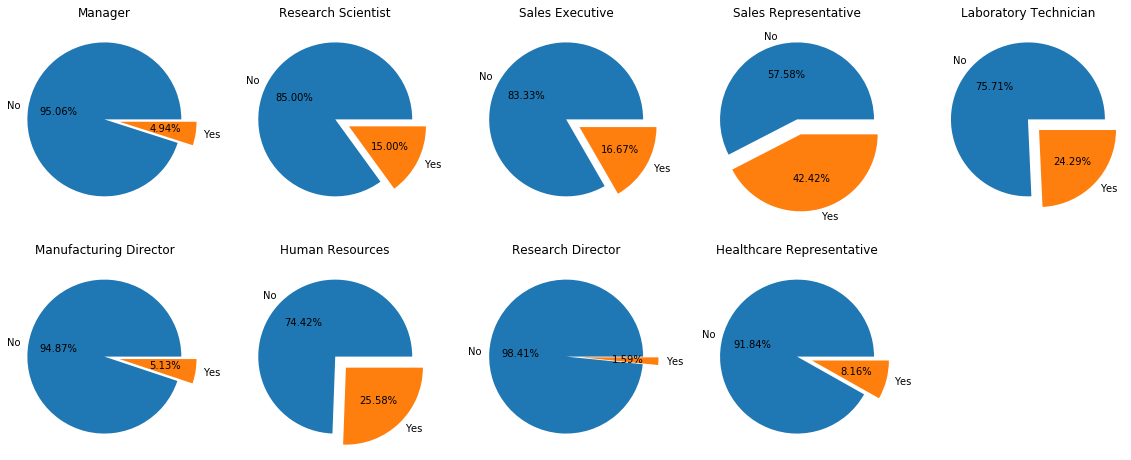

In [30]:
# JobRole
fig = plt.figure(figsize=(20,8)) # 建立图像
L1 = list(data['JobRole'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(2,5,i+1)
    p = data[data['JobRole'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

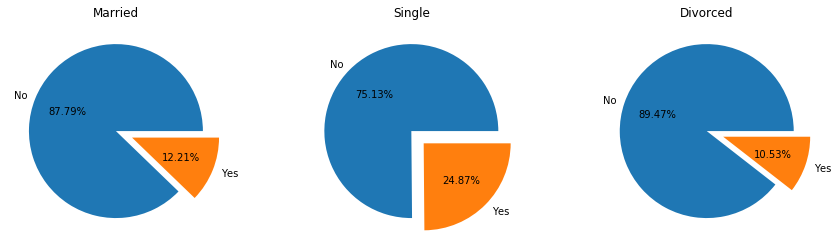

In [31]:
# MaritalStatus
fig = plt.figure(figsize=(15,4)) # 建立图像
L1 = list(data['MaritalStatus'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(1,3,i+1)
    p = data[data['MaritalStatus'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

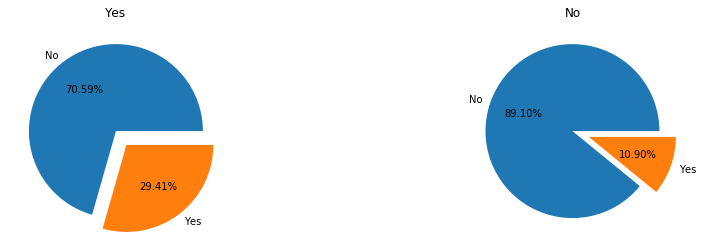

In [32]:
# OverTime
fig = plt.figure(figsize=(15,4)) # 建立图像
L1 = list(data['OverTime'].unique())
for i,c in enumerate(L1):    
    ax = fig.add_subplot(1,2,i+1)
    p = data[data['OverTime'] == c]['Attrition'].value_counts()
    ax.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.2))
    ax.set_title(c)
plt.show() # 展示饼状图

## 五、特征工程

### 5.1 类别型特征转换

In [33]:
# Attrition
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0)

# Gender
data['Gender'] = data['Gender'].apply(lambda x:1 if x == "Male" else 0)

# OverTime
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x == "Yes" else 0)


In [34]:
for fea in  ['BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']:
    labels = data[fea].unique().tolist()
    data[fea] = data[fea].apply(lambda x:labels.index(x))

### 5.2 特征分箱

### 5.3 切分特征和标签

In [35]:
X = data.loc[:,data.columns != "Attrition"]
y = data['Attrition']

### 5.4 样本不均衡

In [36]:
y.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [37]:
sm = SMOTE(random_state=20)
X, y = sm.fit_sample(X,y)

### 5.3 切分训练集和测试集

In [44]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, y ,test_size = 0.3,random_state=0)

### 5.4 模型训练

In [45]:
model = DecisionTreeClassifier(random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8381112984822934

In [46]:
pred = model.predict(Xtest)

In [48]:
y_pred_prob = model.predict_proba(Xtest)[:, 1]
auc_score = roc_auc_score(Ytest,y_pred_prob)#验证集上的auc值
auc_score

0.838745131090408

In [49]:

gini_thresholds = np.linspace(0,0.5,20)

parameters = {
    'splitter':('best','random')
    ,'criterion':("gini","entropy")
    ,"max_depth":[*range(1,10)]
    ,'min_samples_leaf':[*range(1,50,5)]
    ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
}
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10,scoring='roc_auc')
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [50]:
GS.best_score_

0.9235445387585528

In [51]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'best'}

### 5.5 模型评估

In [ ]:

fpr, tpr, thres = roc_curve(Ytest,pr)